## 단순선형회귀

In [1]:
import pandas as pd
from sklearn import linear_model
lung= pd.read_csv('../data/LungDisease.csv')
lung
predictors = ['Exposure']
outcome = 'PEFR'
model = linear_model.LinearRegression()
model.fit(lung[predictors],lung[outcome])
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


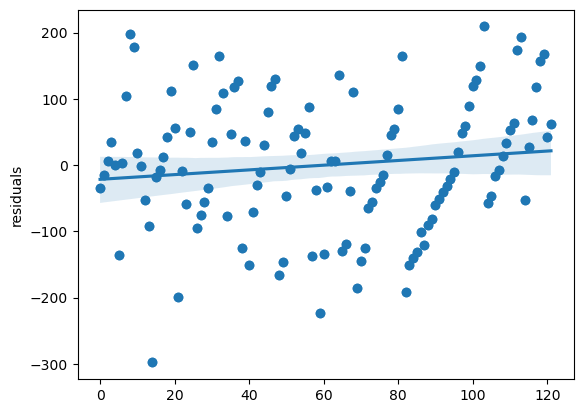

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df.index,df['residuals'])
sns.regplot(x=df.index, y=df.residuals,data = df)
plt.show()
#어떨결에 등분산성 확인했음 ㅋㅋㅋ

In [23]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome]-fitted
residuals
inde = range(0,len(residuals))
df = pd.DataFrame(zip(inde,residuals),columns=['index','residuals'])
df

,index,residuals
0,0,-34.582807
1,1,-14.582807
2,2,5.417193
3,3,35.417193
4,4,-0.398230
...,...,...
117,117,117.477876
118,118,157.477876
119,119,167.477876
120,120,41.662453


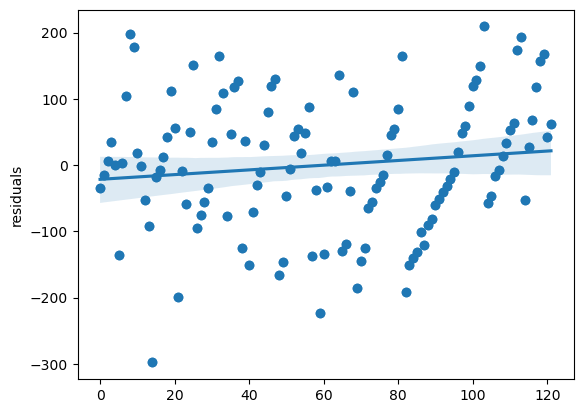

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df.index,df['residuals'])
sns.regplot(x=df.index, y=df.residuals,data = df)
plt.show()
#어떨결에 등분산성 확인했음 ㅋㅋㅋ

In [40]:
import pandas as pd
from sklearn import linear_model
import sklearn
import numpy as np
house= pd.read_csv('../data/house_sales.csv',sep='\t')
#실험변수
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade']
outcome = 'AdjSalePrice' 
house_lm= linear_model.LinearRegression()
house_lm.fit(house[predictors],house[outcome])
print(f'상수 : {house_lm.intercept_:.3f}')
print('회귀계수')
for name, coef in zip(predictors, house_lm.coef_):
    print(f'{name}:{coef:.3f}')

상수 : -521871.368
회귀계수
SqFtTotLiving:228.831
SqFtLot:-0.060
Bathrooms:-19442.840
Bedrooms:-47769.955
BldgGrade:106106.963


In [45]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(house[outcome],fitted))
# r2 = r2_score(house[outcome],fitted)
print(f'RMSE: {RMSE:.0f}')


RMSE: 261220


In [51]:
import statsmodels.api as sm
model = sm.regression.linear_model.OLS(house[outcome], house[predictors])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AdjSalePrice   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          2.512e+04
Date:                Thu, 16 Feb 2023   Prob (F-statistic):                        0.00
Time:                        14:33:00   Log-Likelihood:                     -3.1571e+05
No. Observations:               22687   AIC:                                  6.314e+05
Df Residuals:                   22682   BIC:                                  6.315e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   304.9672      3.236     94.229      0.000     298.624     311.311
SqFtLot          -0.1252      0.063     -1.999      0.046      -0.248      -0.002
Bathrooms      -1.41e+04   3709.458     -3.800      0.000   -2.14e+04   -6824.534
Bedrooms      -8.835e+04   2224.444    -39.720      0.000   -9.27e+04    -8.4e+04
BldgGrade      3.476e+04   1104.840     31.459      0.000    3.26e+04    3.69e+04
==============================================================================
Omnibus:                    29331.571   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17194552.642
Skew:                           6.772   Prob(JB):                         0.00
Kurtosis:                     137.187   Cond. No.                     6.63e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
import pandas as pd
from sklearn import linear_model
import sklearn
import numpy as np
house= pd.read_csv('../data/house_sales.csv',sep='\t')
#실험변수
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade','PropertyType','NbrLivingUnits','SqFtFinBasement','YrBuilt','YrRenovated','NewConstruction']
X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
house_full = sm.OLS(house[outcome],X.assign(const=1))
results =house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:17:16   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
from dmba import stepwise_selection, forward_selection, backward_elimination
import dmba
import statsmodels.stats as stats
y = house[outcome]
def train_model(variables):
    if len(variables) == 0:
        return None
    model = linear_model.LinearRegression()
    model.fit(X[variables],y)
    return model
def score_model(model, variables):
    if len(variables) == 0:        
        return dmba.AIC_score(y, y[y.mean()]*len(y),model, df=1)
    return dmba.AIC_score(y,model.predict(X[variables]),model) 
best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True)

print(f'Intercept {best_model.intercept_:.3f}')
print('Coefficient')
for name, coef in zip(best_variables,best_model.coef_):
    print(f'{name}: {coef}')

KeyError: 565233.2705514171

In [63]:
import pandas as pd
from sklearn import linear_model
import sklearn
import numpy as np
house= pd.read_csv('../data/house_sales.csv',sep='\t')
#실험변수
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade','PropertyType','NbrLivingUnits','SqFtFinBasement','YrBuilt','YrRenovated','NewConstruction']
X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
house_full = sm.OLS(house[outcome],X.assign(const=1))
results =house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:52:55   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
house['year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.year -2005
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade']
outcome = 'AdjSalePrice'
model = linear_model.LinearRegression()
result = model.fit(house[predictors],house[outcome],sample_weight=house.Weight)
print(f'상수 : {result.intercept_:.3f}')
print('회귀계수')
for name, coef in zip(predictors, result.coef_):
    print(f'{name}:{coef:.3f}')

상수 : -584189.329
회귀계수
SqFtTotLiving:245.024
SqFtLot:-0.292
Bathrooms:-26085.970
Bedrooms:-53608.876
BldgGrade:115242.435


In [2]:
import pandas as pd
from sklearn import linear_model
import sklearn
import numpy as np
house= pd.read_csv('../data/house_sales.csv',sep='\t')
house.PropertyType.head()
#실험변수
# predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade','PropertyType','NbrLivingUnits','SqFtFinBasement','YrBuilt','YrRenovated','NewConstruction']
# X = pd.get_dummies(house[predictors], drop_first=True)
# X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
# house_full = sm.OLS(house[outcome],X.assign(const=1))
# results =house_full.fit()
# results.summary()

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object

In [7]:
pd.get_dummies(house['PropertyType']).head()


,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [9]:
pd.get_dummies(house['PropertyType'],drop_first=True).head()

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [13]:
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade','PropertyType']
outcome = 'AdjSalePrice' 

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = linear_model.LinearRegression()
house_lm_factor.fit(X,house[outcome])
print(f'상수: {house_lm_factor.intercept_:.3f}')
print(f'회귀계수')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f'{name} : {coef:.3f}')

상수: -446841.366
회귀계수
SqFtTotLiving : 223.374
SqFtLot : -0.070
Bathrooms : -15979.013
Bedrooms : -50889.732
BldgGrade : 109416.305
PropertyType_Single Family : -84678.216
PropertyType_Townhouse : -115121.979


In [15]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [1]:
import pandas as pd
from sklearn import linear_model
import sklearn
import numpy as np
house= pd.read_csv('../data/house_sales.csv',sep='\t')
#실험변수
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade']
outcome = 'AdjSalePrice' 
house_lm= linear_model.LinearRegression()
house_lm.fit(house[predictors],house[outcome])
zip_groups = pd.DataFrame([*pd.DataFrame({'ZipCode': house['ZipCode'],'residual':house[outcome] - house_lm.predict(house[predictors])}).groupby(['ZipCode']).apply(lambda x: {'ZipCode': x.iloc[0,0], 'count':len(x), 'median_residual': x.residual.median()})]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'],5,labels = False, retbins = False)
to_join = zip_groups[['ZipCode','ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on = 'ZipCode')
house['ZipCode'] = house['ZipCode'].astype('category')
house['ZipCode']

1        98002
2        98166
3        98166
4        98168
5        98168
         ...  
27057    98126
27058    98040
27061    98055
27062    98166
27063    98103
Name: ZipCode, Length: 22687, dtype: category
Categories (80, int64): [98001, 98002, 98003, 98004, ..., 98199, 98224, 98288, 98354]

In [3]:
house.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction', 'ZipGroup'],
      dtype='object')

In [2]:
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade','PropertyType', 'SqFtFinBasement', 'YrBuilt']
outcome = 'AdjSalePrice' 

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = linear_model.LinearRegression()
house_lm_factor.fit(X,house[outcome])
print(f'상수: {house_lm_factor.intercept_:.3f}')
print(f'회귀계수')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f'{name} : {coef:.3f}')

상수: 6183783.879
회귀계수
SqFtTotLiving : 198.489
SqFtLot : 0.079
Bathrooms : 42624.651
Bedrooms : -51757.684
BldgGrade : 137214.372
SqFtFinBasement : 7.269
YrBuilt : -3568.418
PropertyType_Single Family : 22713.024
PropertyType_Townhouse : 84859.430


### 다중공선성

In [3]:
predictors = ['Bedrooms','BldgGrade','PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice' 

X = pd.get_dummies(house[predictors], drop_first=True)
reduced_lm = linear_model.LinearRegression()
reduced_lm.fit(X,house[outcome])
print(f'상수: {reduced_lm.intercept_:.3f}')
print(f'회귀계수')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f'{name} : {coef:.3f}')

상수: 4913973.344
회귀계수
Bedrooms : 27150.537
BldgGrade : 248997.794
YrBuilt : -3211.745
PropertyType_Single Family : -19898.495
PropertyType_Townhouse : -47355.437


### 교란변수

In [4]:
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade','PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice' 

X = pd.get_dummies(house[predictors], drop_first=True)
confounding_lm = linear_model.LinearRegression()
confounding_lm.fit(X,house[outcome])
print(f'상수: {confounding_lm.intercept_:.3f}')
print(f'회귀계수')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f'{name} : {coef:.3f}')

상수: -713359.153
회귀계수
SqFtTotLiving : 209.502
SqFtLot : 0.400
Bathrooms : 7856.429
Bedrooms : -42046.253
BldgGrade : 102320.439
ZipGroup : 81491.994
PropertyType_Single Family : 13710.898
PropertyType_Townhouse : -86594.749


In [5]:
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade','PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice' 

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = linear_model.LinearRegression()
confounding_lm.fit(X,house[outcome])
print(f'상수: {confounding_lm.intercept_:.3f}')
print(f'회귀계수')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f'{name} : {coef:.3f}')

상수: -713359.153
회귀계수
SqFtTotLiving : 209.502
SqFtLot : 0.400
Bathrooms : 7856.429
Bedrooms : -42046.253
BldgGrade : 102320.439
ZipGroup : 81491.994
PropertyType_Single Family : 13710.898
PropertyType_Townhouse : -86594.749


In [6]:
house

NameError: name 'house' is not defined

In [11]:
import statsmodels.api as sm
model = sm.OLS.from_formula(formula = 'AdjSalePrice ~ SqFtTotLiving*ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType', data = house)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     5097.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:38:56   Log-Likelihood:            -3.1144e+05
No. Observations:               22687   AIC:                         6.229e+05
Df Residuals:                   22677   BIC:                         6.230e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.504e+05      2e+04    -22.543      0.000    -4.9e+05   -4.11e+05
PropertyType[T.Single Family]  7151.4567   1.42e+04      0.504      0.614   -2.07e+04     3.5e+04
PropertyType[T.Townhouse]     -6.785e+04   1.54e+04     -4.395      0.000   -9.81e+04   -3.76e+04
SqFtTotLiving                    82.0903      4.321     18.997      0.000      73.621      90.560
ZipGroup                      -4.009e+04   2615.492    -15.329      0.000   -4.52e+04    -3.5e+04
SqFtTotLiving:ZipGroup           56.5726      1.117     50.625      0.000      54.382      58.763
SqFtLot                           0.5696      0.052     10.858      0.000       0.467       0.672
Bathrooms                     -4969.7195   3260.266     -1.524      0.127   -1.14e+04    1420.625
Bedrooms                      -4.457e+04   2159.392    -20.638      0.000   -4.88e+04   -4.03e+04
BldgGrade                      1.092e+05   2093.900     52.157      0.000    1.05e+05    1.13e+05
==============================================================================
Omnibus:                    30996.953   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32932527.973
Skew:                           7.331   Prob(JB):                         0.00
Kurtosis:                     189.074   Cond. No.                     5.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
house_98105= house.loc[house['ZipCode']==98105,]
predictors = ['SqFtTotLiving', 'SqFtLot','Bathrooms','Bedrooms','BldgGrade']
outcome = 'AdjSalePrice'
house_outlier = sm.OLS(house_98105[outcome],house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
influence = OLSInfluence(result_98105)
sresidual = influence.resid_studentized_internal
sresidual.idxmin(), sresidual.min()

(24333, -4.3267318040785705)

In [25]:
outlier = house_98105.loc[sresidual.idxmin(),:]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


Text(0, 0.5, 'studentized residuals')

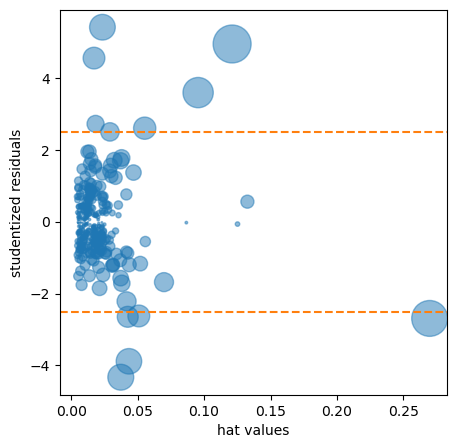

In [28]:
import matplotlib.pyplot as plt
import numpy as np
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize = (5,5))
ax.axhline(-2.5, linestyle = '--', color = 'C1')
ax.axhline(2.5, linestyle = '--', color = 'C1')
ax.scatter(influence.hat_matrix_diag,influence.resid_studentized_internal, s=1000*np.sqrt(influence.cooks_distance[0]),alpha=0.5)
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')


<AxesSubplot: >

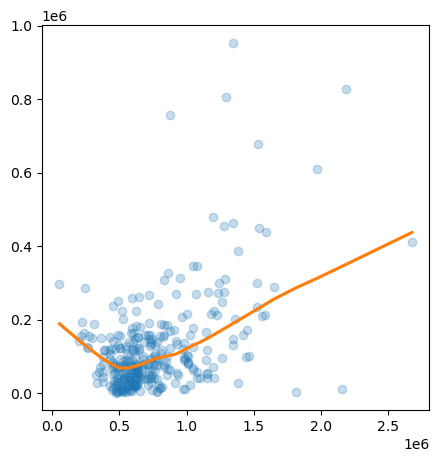

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x = result_98105.fittedvalues, y=np.abs(result_98105.resid), scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'}, lowess=True, ax=ax)



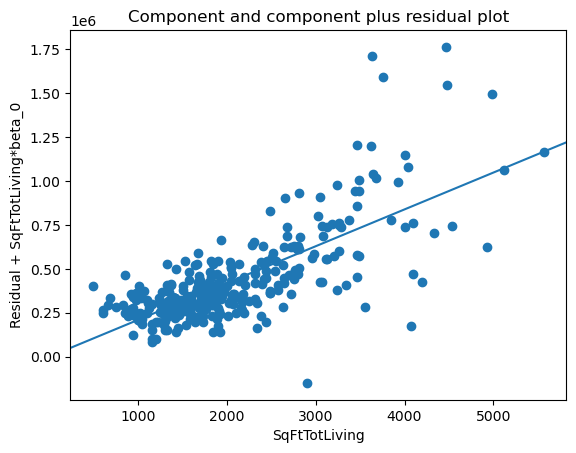

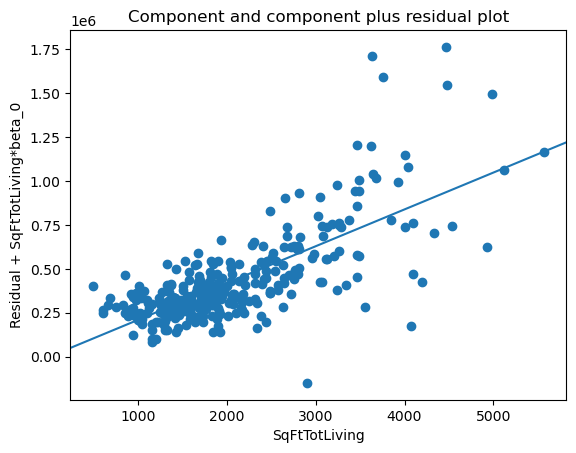

In [41]:
sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving')

In [2]:
model_poly = sm.OLS.from_formula(formula = 'AdjSalePrice ~ SqFtTotLiving +I(SqFtTotLiving**2) +SqFtLot + Bathrooms + Bedrooms + BldgGrade',data= house_98105)
result_poly = model_poly.fit()
result_poly.summary()

NameError: name 'sm' is not defined

<AxesSubplot: >

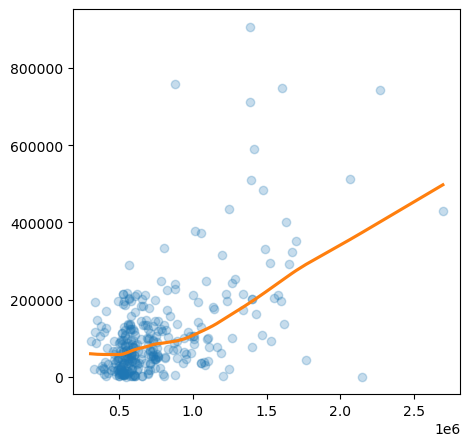

In [14]:
formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + SqFtLot + Bathrooms + Bedrooms + BldgGrade'
import statsmodels.api as sm
model_spline = sm.OLS.from_formula(formula = formula, data=house_98105)
results = model_spline.fit()
results.summary()

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x = results.fittedvalues, y=np.abs(results.resid), scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'}, lowess=True, ax=ax)



In [15]:
# 필요한 라이브러리 import
from pygam import LinearGAM

# GAM 모델 생성
gam = LinearGAM().fit(X, y)

# 예측값 계산
y_pred = gam.predict(X_new)

# 모델 성능 평가
gam.summary()

ModuleNotFoundError: No module named 'pygam'

In [3]:
import sklearn.naive_bayes as sk
import pandas as pd
loan_data = pd.read_csv('../data/loan3000.csv')
loan_data.head()
# predictors = ['purpose_','home_','emp_len_']
# outcome = 'outcome'
# X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='')
# y= loan_data[outcome]
# navie_model = sk.MultinomialNB(alpha=0.01, fit_prior=True)
# navie_model(X, y)

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [9]:
import pandas as pd
import sklearn.discriminant_analysis as skd

loan3000 = pd.read_csv('../data/loan3000.csv')
loan3000.outcome = loan3000.outcome.astype('category')
predictors = ['borrower_score','payment_inc_ratio']
outcome = 'outcome'
X = loan3000[predictors]
y= loan3000[outcome]
loan_LDA = skd.LinearDiscriminantAnalysis()
loan_LDA.fit(X,y)
pd.DataFrame(loan_LDA.scalings_, index=X.columns)
pred = pd.DataFrame(loan_LDA.predict_proba(loan3000[predictors]), columns=loan_LDA.classes_)
pred

,default,paid off
0,0.553544,0.446456
1,0.558953,0.441047
2,0.272696,0.727304
3,0.506254,0.493746
4,0.609952,0.390048
...,...,...
2995,0.652343,0.347657
2996,0.269632,0.730368
2997,0.870534,0.129466
2998,0.557133,0.442867


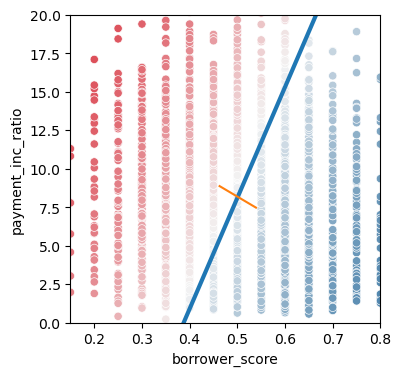

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#스케일링 개수와 평균값의 중간값을 이용하여 결정 경계를 구한다.
center = np.mean(loan_LDA.means_, axis=0)
slope = -loan_LDA.scalings_[0]/loan_LDA.scalings_[1]#제곱합의 비율을 의미함.
intercept = center[1] - slope*center[0]

#payment_inc_ration가 0또는 20이 되는 borrowers_scores 값을 구한다.
x_0 = (0-intercept)/slope
x_20 = (20-intercept)/slope
LAD_df = pd.concat([loan3000,pred['default']],axis=1)
LAD_df.head()

fig, ax = plt.subplots(figsize=(4, 4))
g = sns.scatterplot(x = 'borrower_score', y = 'payment_inc_ratio', hue ='default', data = LAD_df, ax = ax, palette= sns.diverging_palette(240, 10, n = 9, as_cmap=True), legend = False)


ax.set_ylim(0,20)
ax.set_xlim(0.15,0.8)
ax.plot((x_0, x_20), (0, 20),linewidth= 3)
ax.plot(*loan_LDA.means_.transpose())
